## Submission #3 scored 79.425% and got me top 25%

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
print(os.listdir("input"))

['test.csv', 'train.csv', 'gender_submission.csv']


In [3]:
train = pd.read_csv('input/train.csv')
test  = pd.read_csv('input/test.csv')
passengerId = test.PassengerId

print(len(train), len(test))

891 418


In [4]:
df = train.append(test, ignore_index=True, sort=False)

In [5]:
train_idx = len(train)
test_idx = len(df) - len(test)

In [6]:
df.columns[df.isna().any()].tolist()

['Survived', 'Age', 'Fare', 'Cabin', 'Embarked']

In [7]:
df.loc[1043, 'Fare'] = 7.75
df.loc[61, 'Embarked'] = 'C'
df.loc[829, 'Embarked'] = 'C'
df.Cabin = df.Cabin.fillna('U')

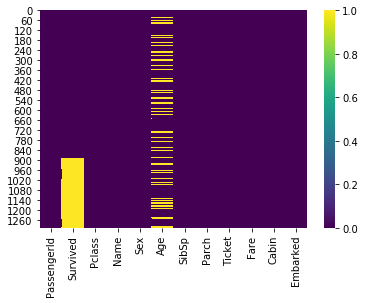

In [8]:
sns.heatmap(df.isnull(), cmap='viridis')

In [9]:
df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

df.Title = df.Title.map(normalized_titles)
print(df.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


In [10]:
grouped = df.groupby(['Sex', 'Pclass', 'Title'])
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [11]:
df.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

df['FamilySize'] = df.Parch + df.SibSp + 1
df.Cabin = df.Cabin.apply(lambda x: x[0])

df.Sex = df.Sex.map({"male": 0, "female":1})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,Mr,1


In [12]:
pclass_dummies = pd.get_dummies(df.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(df.Title, prefix="Title")
cabin_dummies = pd.get_dummies(df.Cabin, prefix="Cabin")
embarked_dummies = pd.get_dummies(df.Embarked, prefix="Embarked")

df_dummies = pd.concat([df, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)
df_dummies.drop(['PassengerId', 'Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket','SibSp', \
                 'Parch', 'Pclass_3', 'Cabin_U', 'Embarked_Q', 'Title_Mr'], axis=1, inplace=True)

df_dummies.head()

,Survived,Sex,Age,Fare,FamilySize,Pclass_1,Pclass_2,Title_Master,Title_Miss,Title_Mrs,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_S
0,0.0,0,22.0,7.2500,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,71.2833,2,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1.0,1,26.0,7.9250,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,35.0,53.1000,2,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0.0,0,35.0,8.0500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
train = df_dummies[:train_idx]
train['Survived'] = train.Survived.astype(int)

test = df_dummies[test_idx:].drop('Survived', axis=1)

/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X = train.drop('Survived', axis=1)
y = train.Survived

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
forest_params = dict(     
    max_depth = [n for n in range(9, 14)],     
    min_samples_split = [n for n in range(4, 11)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(15, 30, 5)],
)

In [16]:
rfc = RandomForestClassifier()

forest_cv = GridSearchCV(estimator=rfc, param_grid=forest_params, cv=5) 
forest_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [9, 10, 11, 12, 13], 'min_samples_split': [4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [2, 3, 4], 'n_estimators': [15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print("Best score: {}".format(forest_cv.best_score_))
print("Optimal params: {}".format(forest_cv.best_estimator_))

# rfc.fit(X_train, y_train)
# pred = rfc.predict(X_valid)
# print(confusion_matrix(y_valid, pred))
# print('\n')
# print(classification_report(y_valid, pred))

Best score: 0.8361391694725028
Optimal params: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [18]:
sub_pred = forest_cv.predict(test)

submission = pd.DataFrame({'PassengerId': passengerId, 'Survived': sub_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [19]:
filename = 'Titanic Predictions 3.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Titanic Predictions 3.csv
